In [1]:
# Fashion Product Recomended System

# Detail
# In this project we use fashion dataset that was on kaggle

# 1st we need to reshape the image
# 2nd preprocess_input we use to get input as use in in ResNet50
# we use built in mdoel becasue its already train on large dataset

In [1]:
# using Library

import pandas as pd
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as imd
from tensorflow.keras.preprocessing.image import load_img,img_to_array
from tensorflow.keras.applications.resnet50 import ResNet50,preprocess_input
from tensorflow.keras.layers import Flatten,GlobalMaxPool2D
from numpy.linalg import norm

In [2]:
# Extarct Feature of Image
def extract_feature(file,model):
    img = load_img(file,target_size=(224,224))
    img = img_to_array(img)
    img = np.expand_dims(img,axis=0)
    process_img = preprocess_input(img)
    result = model.predict(process_img)
    result = result / norm(result)
    return result

In [3]:
model = ResNet50(include_top=False,input_shape=(224,224,3))
model.trainable = False
model = tf.keras.Sequential([
    model,
    GlobalMaxPool2D()
])

94765736/94765736 ━━━━━━━━━━━━━━━━━━━━ 1218s 13us/step


In [4]:
url = 'https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcR4Esjs4QwpqXmDZk4xSQoSGHItbA9q-MCePQ&s'
import requests
req = requests.get(url)
with open('test.jpg', 'wb') as handler:
    handler.write(req.content)

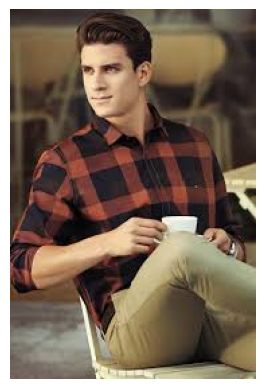

In [5]:
plt.imshow(imd.imread('test.jpg'))
plt.axis('off')
plt.show()
plt.show()

In [6]:
image_feature = extract_feature('test.jpg',model)

1/1 ━━━━━━━━━━━━━━━━━━━━ 5s 5s/step


In [7]:
image_feature

array([[0.00777652, 0.01920511, 0.0054625 , ..., 0.02454942, 0.004836  ,
        0.00685477]], dtype=float32)

In [10]:
import pickle
feature_list = np.array(pickle.load(open('feature_data.pkl','rb')))
filenames = pickle.load(open('file_names.pkl','rb'))

In [11]:
feature_list = feature_list.reshape(feature_list.shape[0], -1)

In [12]:
from sklearn.neighbors import NearestNeighbors
neighbors = NearestNeighbors(n_neighbors=6, algorithm='brute', metric='euclidean')
neighbors.fit(feature_list)

NearestNeighbors(algorithm='brute', metric='euclidean', n_neighbors=6)

In [13]:
image_feature = np.array(image_feature)
distances,indices = neighbors.kneighbors(image_feature)

In [21]:
for i in range(6):
  print(filenames[indices[0][i]])

14298.jpg
57268.jpg
3772.jpg
7891.jpg
14295.jpg
7817.jpg


(-0.5, 182.5, 274.5, -0.5)

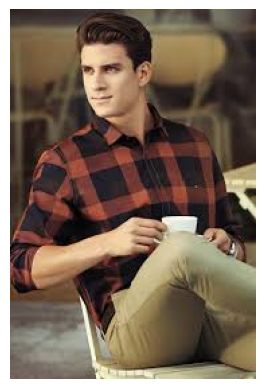

In [24]:
plt.imshow(imd.imread('test.jpg'))
plt.axis('off')

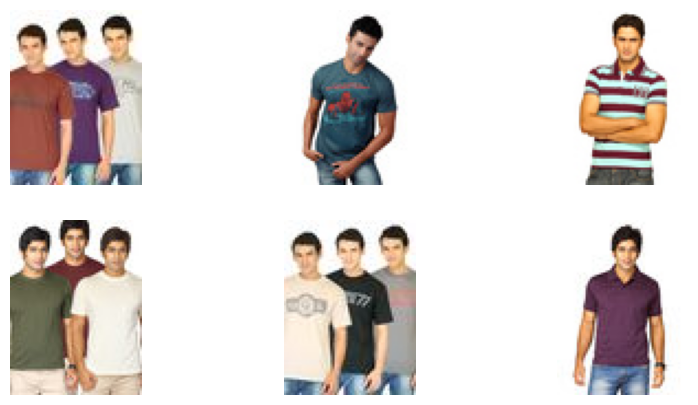

In [25]:
plt.figure(figsize=(10,5))
path = './images/'
for i in range(6):
    name = filenames[indices[0][i]]
    plt.subplot(2,3,i+1)
    plt.imshow(imd.imread(path + name))
    plt.axis('off')

In [27]:
df = pd.read_csv('styles.csv',on_bad_lines='skip')
df.head()

,id,gender,masterCategory,subCategory,articleType,baseColour,season,year,usage,productDisplayName
0,15970,Men,Apparel,Topwear,Shirts,Navy Blue,Fall,2011.0,Casual,Turtle Check Men Navy Blue Shirt
1,39386,Men,Apparel,Bottomwear,Jeans,Blue,Summer,2012.0,Casual,Peter England Men Party Blue Jeans
2,59263,Women,Accessories,Watches,Watches,Silver,Winter,2016.0,Casual,Titan Women Silver Watch
3,21379,Men,Apparel,Bottomwear,Track Pants,Black,Fall,2011.0,Casual,Manchester United Men Solid Black Track Pants
4,53759,Men,Apparel,Topwear,Tshirts,Grey,Summer,2012.0,Casual,Puma Men Grey T-shirt


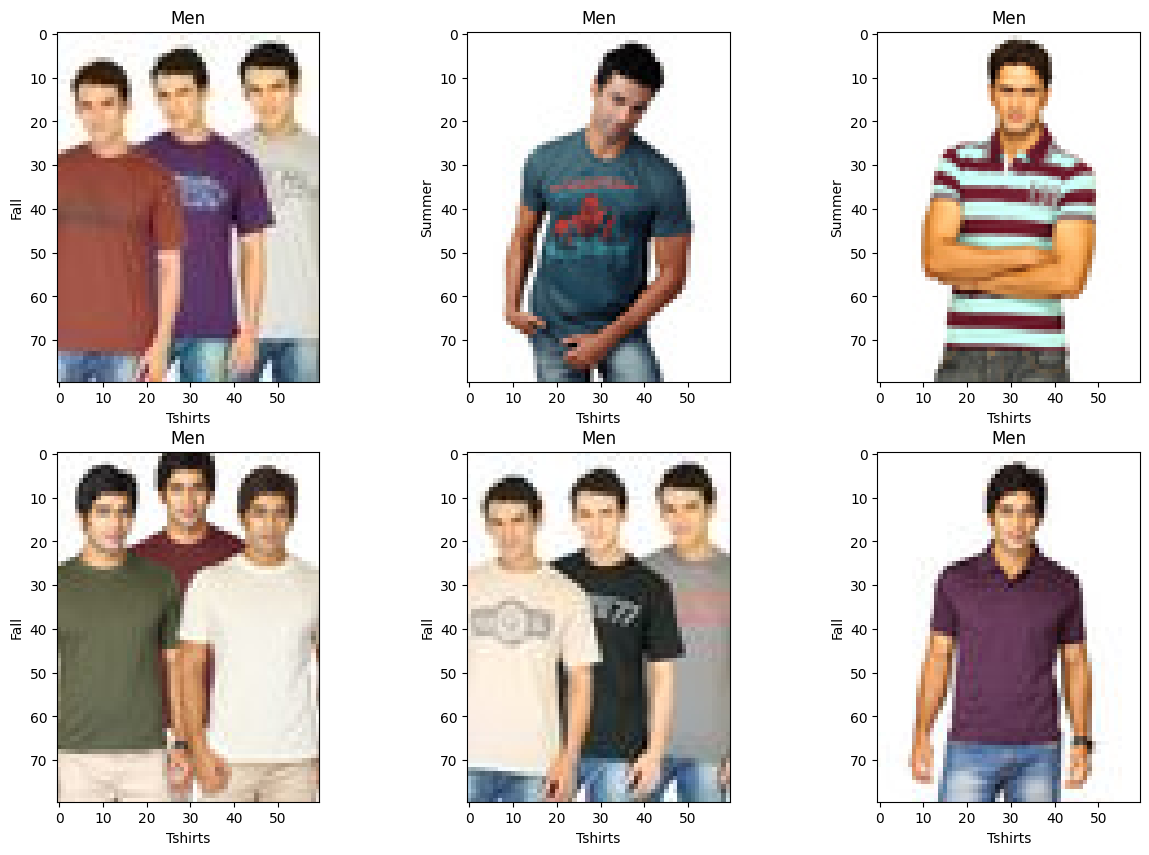

In [55]:
plt.figure(figsize=(15,10))
path = './images/'
for i in range(6):
    name = filenames[indices[0][i]]
    plt.subplot(2,3,i+1)
    plt.imshow(imd.imread(path + name))
    val = int(name.split('.')[0])
    plt.title(df[df['id'] == val]['gender'].iloc[0])
    plt.xlabel(df[df['id'] == val]['articleType'].iloc[0])
    plt.ylabel(df[df['id'] == val]['season'].iloc[0])